# Correlation Matrices

Strength of a Linear Relationship as given by the Correlation Coefficient<br>
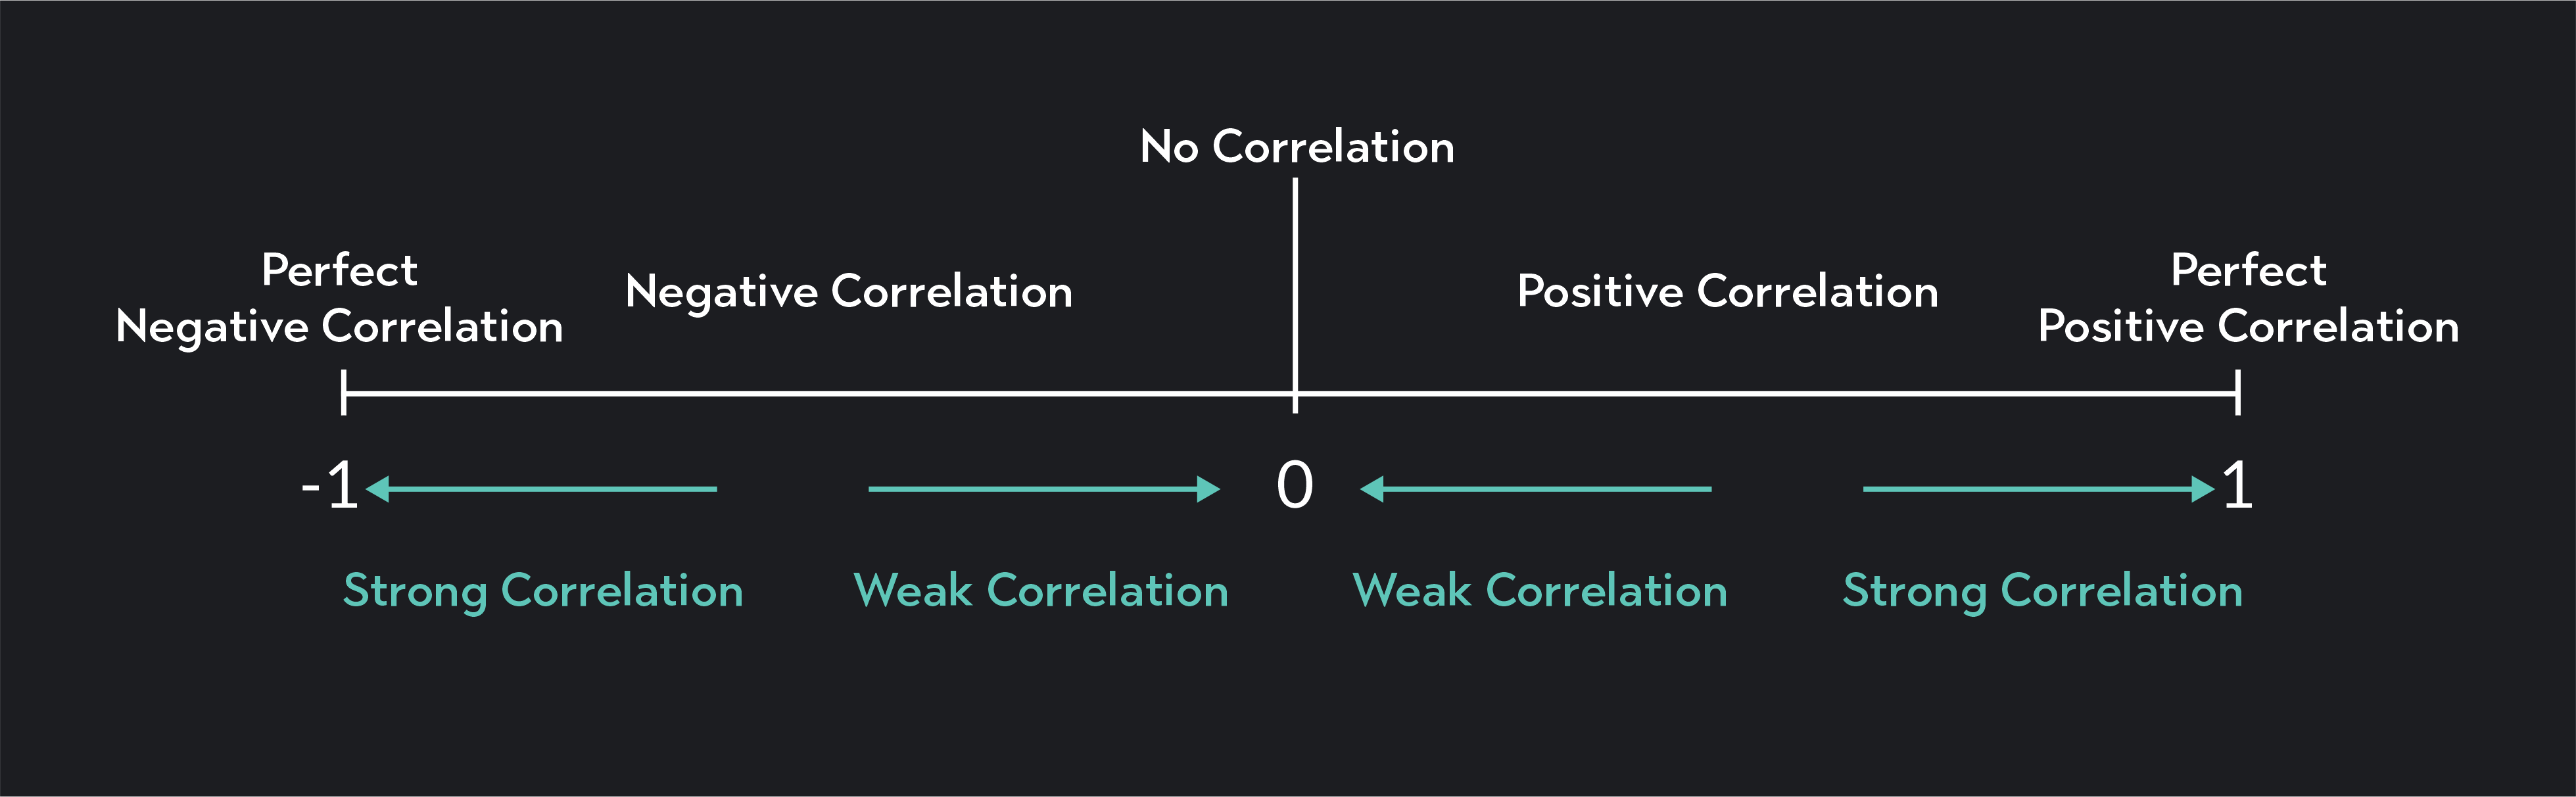

## Pearson or Product Moment Correlation
A multivariate parametric correlation method

In [1]:
import os
os.chdir("/Applications/Stata/utilities")
from pystata import config
config.init("se")

import pandas as pd

AIBL = '/Users/mujiechen/Jupyter-Notebook/STATA/Datasets/AIBL_regression.dta'
AIBL = pd.read_stata(AIBL)


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      StataNow 18.5
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2023 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-782-8272        https://www.stata.com
                                   979-696-4600        service@stata.com

Stata license: Unlimited-user network, expiring  9 Sep 2025
Serial number: 501809305305
  Licensed to: Mujie
               

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000 but can be increased;
          see help set_maxvar.


In [2]:
print(AIBL.head())

   ID  ClinClass0M  MMSE  age_first_seen  GENDER   HCY  Chol  \
0   2            0    29              65       0  14.3   5.1   
1  10            1    21              81       0   7.7   4.1   
2  14            0    30              65       1   8.8   5.3   
3  15            0    28              86       0   6.6   4.8   
4  16            0    27              81       1   7.7   7.3   

   MedHistHypertension  AX94374957_T  AX150725234_T  ...  AX14083237_A  \
0                    0      2.303407       2.161415  ...      0.000000   
1                    0      2.303407       2.161415  ...      2.165174   
2                    0     -0.433684      -0.462172  ...     -0.454659   
3                    0      0.000000      -0.462172  ...     -0.454659   
4                    0      0.000000       0.000000  ...     -0.454659   

   AX57849402_G  AX11635492_T  AX164435360_C  AX158719163_T  AX83496240_A  \
0      2.274424     -0.579667        2.24745       2.923519     -0.309601   
1      2.274424 


. 
. correlate MMSE age_first_seen HCY Chol
(obs=559)

             |     MMSE age_fi~n      HCY     Chol
-------------+------------------------------------
        MMSE |   1.0000
age_first_~n |  -0.4333   1.0000
         HCY |  -0.1474   0.3065   1.0000
        Chol |   0.0212  -0.1853  -0.1645   1.0000


. by GENDER, sort: correlate MMSE age_first_seen HCY Chol

-------------------------------------------------------------------------------
-> GENDER = 0
(obs=260)

             |     MMSE age_fi~n      HCY     Chol
-------------+------------------------------------
        MMSE |   1.0000
age_first_~n |  -0.3925   1.0000
         HCY |  -0.0970   0.2312   1.0000
        Chol |  -0.0372  -0.2181  -0.1268   1.0000


-------------------------------------------------------------------------------
-> GENDER = 1
(obs=299)

             |     MMSE age_fi~n      HCY     Chol
-------------+------------------------------------
        MMSE |   1.0000
age_first_~n |  -0.4633   1.0000
        

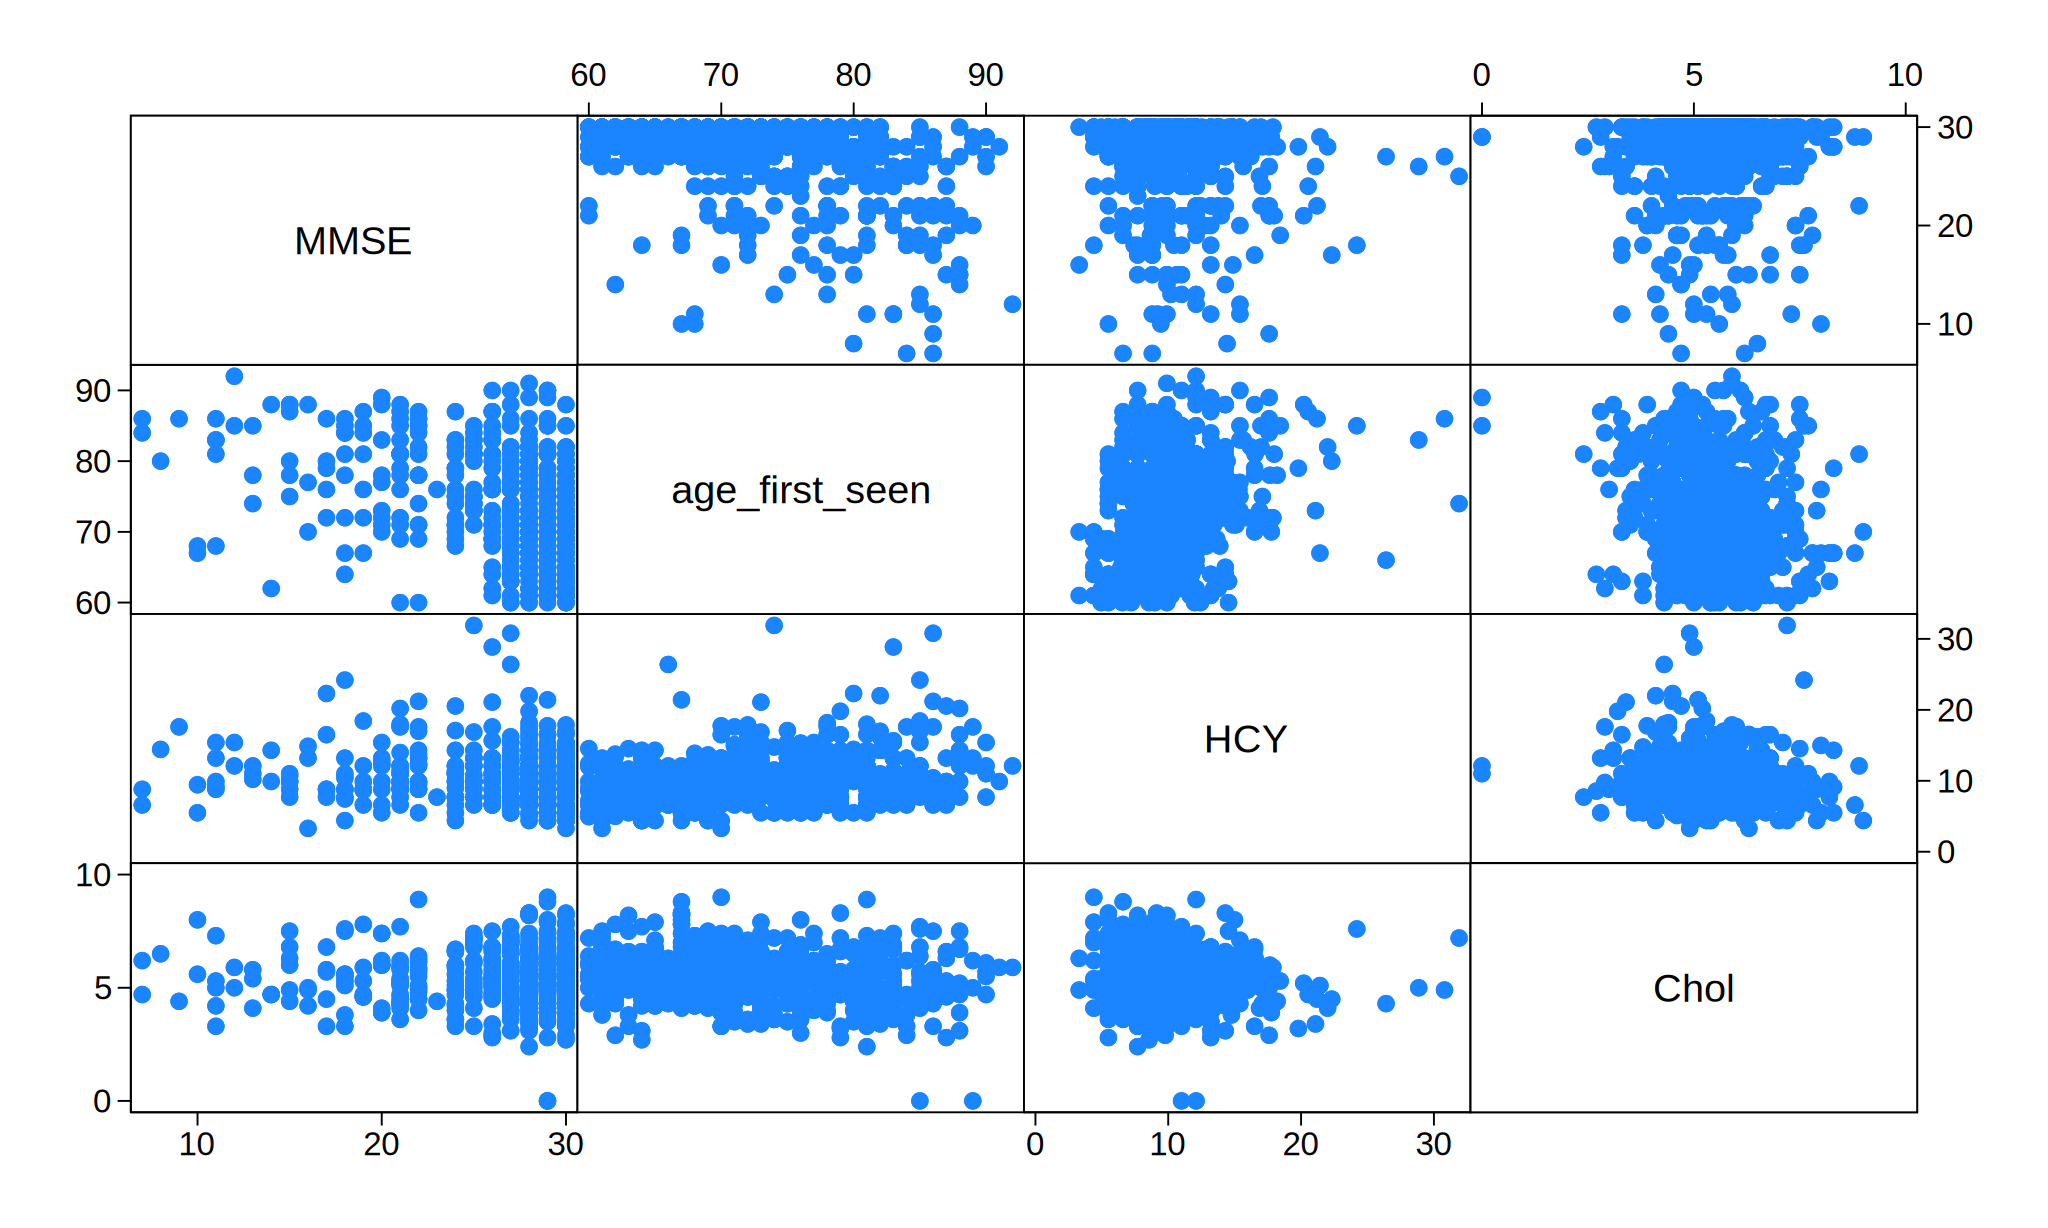

In [3]:
%%stata -d AIBL

correlate MMSE age_first_seen HCY Chol
by GENDER, sort: correlate MMSE age_first_seen HCY Chol

graph matrix MMSE age_first_seen HCY Chol

The first argument (MMSE) is the reference variables and will be on the y-axis<br>
In multivariate analysis producing a correlation matrix, the row titles will be on the y-axis and the column titles will be on the a-xis

## Spearman or Rank Correlation
A non-parametric correlation method

In [4]:
%%stata

spearman MMSE Chol


. 
. spearman MMSE Chol

Number of observations =    559
        Spearman's rho = 0.0420

Test of H0: MMSE and Chol are independent
                  Prob = 0.3210

. 


## Estimate Covariance Matrix
correlate VARIABLE1 VARIABLE2 VARIABLE3 [aweight=VARIABLE4], covariance // where VARIABLE4 is used as analytic weight

_____________________________________________________________________________________________________________________________________________
# Power Analysis
## Sample Size Calculation for Comparing Means

Sample size is inversely proportional to power of the test (1 - β)<br>

|Sample Size|Value at which correlation coefficient becomes significant at the 5% level|
|-|-|
|10|0.63|
|20|0.44|
|50|0.28|
|100|0.2|
|150|0.16|

The bigger the sample size, the lower the correlation coefficient required to be significant (keeping alpha at 0.05)

Given by<br>
$N_{per\:group}= \frac{2s^2(z {\frac{\alpha}{2}}+z{\beta})^2}{t ^2}$,<br>
where s = SD of the outcome<br>
t = Smallest clinically important difference (reduction) in mean outcome between the groups<br>$z_{\frac{\alpha}{2}}$ = Quantile related to hypothesis test significance level (1.96 for 5%)<br>
<i>z</i>$_\beta$ = Quantile related to hypothesis test of power. For 90% power, <i>z</i>$_\beta$ = 1.28

#### Example:
To calculate the sample size needed to achieve 0.9 power for detecting a difference in means between the groups, given population SD of 3

In [5]:
%%stata

power twomeans 7 12, sd(3) power(0.9) // The first argument is used as a reference point and is arbitrary for calculating N
power twomeans 7, diff(5) sd(3) power(0.9)


. 
. power twomeans 7 12, sd(3) power(0.9) // The first argument is used as a refe
> rence point and is arbitrary for calculating N

Performing iteration ...

Estimated sample sizes for a two-sample means test
t test assuming sd1 = sd2 = sd
H0: m2 = m1  versus  Ha: m2 != m1

Study parameters:

        alpha =    0.0500
        power =    0.9000
        delta =    5.0000
           m1 =    7.0000
           m2 =   12.0000
           sd =    3.0000

Estimated sample sizes:

            N =        18
  N per group =         9

. power twomeans 7, diff(5) sd(3) power(0.9)

Performing iteration ...

Estimated sample sizes for a two-sample means test
t test assuming sd1 = sd2 = sd
H0: m2 = m1  versus  Ha: m2 != m1

Study parameters:

        alpha =    0.0500
        power =    0.9000
        delta =    5.0000
           m1 =    7.0000
           m2 =   12.0000
         diff =    5.0000
           sd =    3.0000

Estimated sample sizes:

            N =        18
  N per group =         9



## Sample Size Calculation for Comparing Proportions

Given by<br>
$N = \frac{[z_{\frac{a}{2}}\:*\:\sqrt{2\:*\:p(1-p)}\:+\:z_{\beta}\:*\:\sqrt{p_1(1-p_1)\:+\:p_2(1-p_2)}]^2}
{(p_1-p_2)^2}$<br>
where <i>z</i>$_{\frac{\alpha}{2}}$ for 5% significance level = 1.96<br>
<i>z</i>$_{\beta}$ = 0.84 for 80% power<br>
<i>p</i>$_1$ = current probability of success<br>
<i>p</i>$_2$ = maximum/minimum prevalence rate that would sign reduction/increase<br>
<i>p</i> = $\frac{p_1+p_2}{2}$

#### Example:
Sample size needed to achieve 0.80 power for detecting a difference between two proportions (0.123, 0.8)

In [6]:
%%stata

power twoproportions 0.123 0.3, test(chi2) power(0.8) alpha(0.05) // alpha is 0.05 by default, can be omitted


. 
. power twoproportions 0.123 0.3, test(chi2) power(0.8) alpha(0.05) // alpha is
>  0.05 by default, can be omitted

Performing iteration ...

Estimated sample sizes for a two-sample proportions test
Pearson's chi-squared test 
H0: p2 = p1  versus  Ha: p2 != p1

Study parameters:

        alpha =    0.0500
        power =    0.8000
        delta =    0.1770  (difference)
           p1 =    0.1230
           p2 =    0.3000

Estimated sample sizes:

            N =       166
  N per group =        83

. 


## Accounting for Attrition Rate

$n*=\frac{N}{1-d}$, where d = expected dropout rate

If the dropout rate is 10%, then 90% of participants are expected to follow through with the study<br>
$n*=\frac{166}{1-0.1} \approx 185$